# Classifying movie reviews : A binary classification

We’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.<br>
The IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary

In [16]:
# for multiple line output in notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [30]:
# Loading the imdb dataset
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

The argument num_words=10000 means we’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows us to work with vector data of manageable size

In [12]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

Decoding one of these reviews back to English word

In [5]:
# word_index is a dictionary mapping words to an integer index.
word_index = imdb.get_word_index()

# Reverses it, mapping integer indices to words
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

# Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 
# are reserved indices for “padding,” “start of sequence,” and “unknown.”
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

1646592/1641221 [==============================] - 4s 3us/step


In [6]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [7]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [11]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Preparing the data

We cannot feed list of integers to our neural network. We have to turn our list into tensors(matrix). Let's use one hot encoding to convert the lists into vectors containing only 0's and 1's

In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # Creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 # Sets specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
x_train
x_train[0]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

array([0., 1., 1., ..., 0., 0., 0.])

In [18]:
# Vectorizing our labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [19]:
y_train
y_test

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

## Training the model

In [22]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Hidden Units
The argument being passed to each Dense layer (16) is the number of hidden units of the layer. <br>
A hidden unit is a dimension in the representation space of the layer<br>
Each such Dense layer with a relu activation implements the following chain of tensor operations:<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<b>output = relu(dot(W, input) + b)</b><br>
Having 16 hidden units means the weight matrix W will have shape (input_dimension, 16): the dot product with W will project the input data onto a 16-dimensional representation space (and then we’ll add the bias vector b and apply the relu operation)<br>
Having more hidden units (a higher-dimensional representation space) allows your network to learn more-complex representations, but it makes the network more computationally expensive and may lead to learning unwanted patterns (patterns that will improve performance on the training data but not on the test data).

### What are activation functions, and why are they necessary

Without an activation function like relu (also called a non-linearity), the Dense layer would consist of two linear operations—a dot product and an addition:<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<b>output = dot(W, input) + b</b><br>
So the layer could only learn linear transformations (affine transformations) of the input data: the hypothesis space of the layer would be the set of all possible linear transformations of the input data into a 16-dimensional space. Such a hypothesis space is too restricted and wouldn’t benefit from multiple layers of representations, because a deep stack of linear layers would still implement a linear operation: adding more layers wouldn’t extend the hypothesis space.<br>

In order to get access to a much richer hypothesis space that would benefit from deep representations, you need a non-linearity, or activation function. relu is the most popular activation function in deep learning, but there are many other candidates, which all come with similarly strange names: prelu, elu, and so on
           
                

In [23]:
# In order to monitor during training accuracy of model on the data it has never seen before, we will create
# a validation set by setting apart 10000 samples from the original data set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# compiling the model
model.compile(optimizer='rmsprop', 
             loss = 'binary_crossentropy', 
             metrics = ['accuracy'])

# we will now train the model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), 
# in mini-batches of 512 samples. At the same time, we’ll monitor loss and accuracy on the 10,000 samples that 
# we set apart. We do so by passing the validation data as the validation_data argument
history = model.fit(partial_x_train, 
                   partial_y_train, 
                   batch_size=512, 
                   epochs=20,
                   validation_data=(x_val, y_val))

# On CPU, this will take less than 2 seconds per epoch—training is over in 20 seconds. At the end of every epoch, 
# there is a slight pause as the model computes its loss and accuracy on the 10,000 samples of the validation data.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 254us/step - loss: 0.5177 - accuracy: 0.7883 - val_loss: 0.4084 - val_accuracy: 0.8525
Epoch 2/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.3118 - accuracy: 0.9020 - val_loss: 0.3057 - val_accuracy: 0.8872
Epoch 3/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2249 - accuracy: 0.9261 - val_loss: 0.2914 - val_accuracy: 0.8843
Epoch 4/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1780 - accuracy: 0.9422 - val_loss: 0.2739 - val_accuracy: 0.8910
Epoch 5/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.1431 - accuracy: 0.9557 - val_loss: 0.2892 - val_accuracy: 0.8861
Epoch 6/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.1174 - accuracy: 0.9633 - val_loss: 0.

In [29]:
history_dict = history.history

import pandas as pd
df = pd.DataFrame({'training_loss':history_dict['loss'], 'training_acc':history_dict['accuracy'], 
                   'validation_loss':history_dict['val_loss'], 'validation_acc':history_dict['val_accuracy']})
df

,training_loss,training_acc,validation_loss,validation_acc
0,0.517738,0.788267,0.408440,0.8525
1,0.311793,0.902000,0.305663,0.8872
2,0.224945,0.926067,0.291426,0.8843
3,0.177995,0.942200,0.273858,0.8910
4,0.143136,0.955733,0.289242,0.8861
5,0.117438,0.963333,0.292586,0.8842
6,0.096779,0.971000,0.319624,0.8826
7,0.081108,0.977400,0.343390,0.8800
8,0.065304,0.982867,0.381011,0.8708
9,0.051000,0.988800,0.380639,0.8757


As we can see that our 'loss' is continuously decreasing from first(0.5177) to twentieth(0.0045) iteration and accuracy is increased from 0.7882 to 0.9995 which is a good sign for our model but when we see the loss at validation set then from fifth iteration it started to rise which shows that our model is overfitting.

## Visual Representation

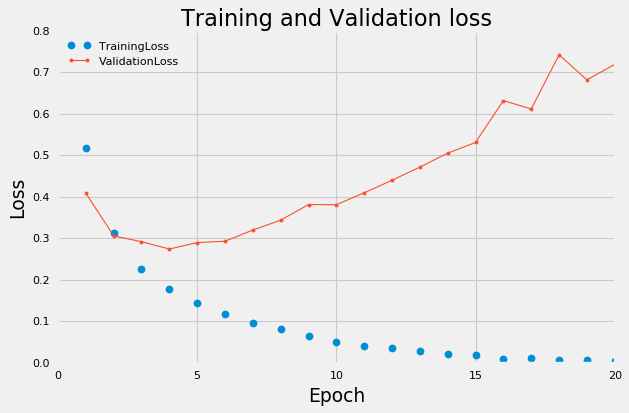

In [63]:
# Plotting training loss and validation loss

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize=(8,5))
epoch = range(1, len(df['training_loss'])+1)

plt.plot(epoch, df['training_loss'], marker='o', label='TrainingLoss', linewidth=0)
plt.plot(epoch, df['validation_loss'], marker='.', label='ValidationLoss', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation loss')
plt.legend(loc='best');

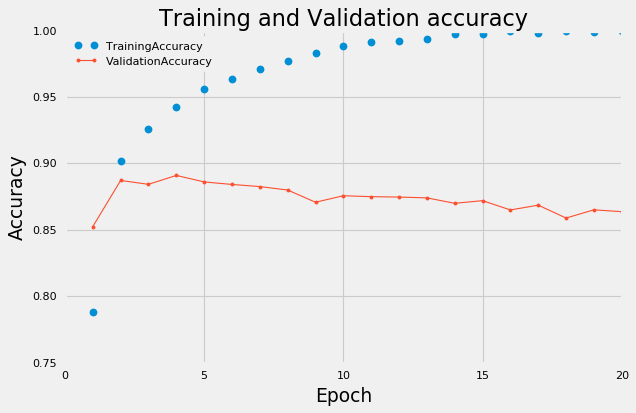

In [68]:
# Plotting training accuracy and validation accuracy

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize=(8,5))
epoch = range(1, len(df['training_loss'])+1)

plt.plot(epoch, df['training_acc'], marker='o', label='TrainingAccuracy', linewidth=0)
plt.plot(epoch, df['validation_acc'], marker='.', label='ValidationAccuracy', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc=2);

In [69]:
result = model.evaluate(x_test, y_test)
result

25000/25000 [==============================] - 5s 198us/step


[0.780168782467842, 0.8524399995803833]

In [72]:
model.predict(x_test)

array([[0.00366452],
       [1.        ],
       [0.9989353 ],
       ...,
       [0.00200301],
       [0.01529557],
       [0.81861305]], dtype=float32)